In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Text Processing and Dates

In [2]:
!cat log.txt

169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"
193.205.203.3 - - [2/Feb/2005:17:23:6 -0800] "GET /stat141/Notes/dim.html HTTP/1.0" 404 302 "http://eeyore.ucdavis.edu/stat141/Notes/session.html"
169.237.46.240 - "" [3/Feb/2006:10:18:37 -0800] "GET /stat141/homework/Solutions/hw1Sol.pdf HTTP/1.1"


In [3]:
lines = open('log.txt').readlines()
first = lines[0]
first

'169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"\n'

String manipulation based on character positions.

In [4]:
time_str = first.split('[', 1)[1].split(' ', 1)[0]
day, month, rest = time_str.split('/')
year, hour, minute, second = rest.split(':')
year, month, day, hour, minute, second

('2014', 'Jan', '26', '10', '47', '58')

In [5]:
time_strs = (pd.Series(lines).str.split('[', 1, expand=True)[1]
             .str.split(' ', 1, expand=True)[0])
day_month_rest = time_strs.str.split('/', expand=True)
pd.concat([day_month_rest.loc[:, 0:1], 
           day_month_rest[2].str.split(':', expand=True)], axis=1)

,0,1,0,1,2,3
0,26,Jan,2014,10,47,58
1,2,Feb,2005,17,23,6
2,3,Feb,2006,10,18,37


String manipulation based on regular expressions.

In [6]:
import re
pattern = r'(\d+)/(\w+)/(\d+):(\d+):(\d+):(\d+)'
day, month, year, hour, minute, second = re.search(pattern, first).groups()
year, month, day, hour, minute, second

('2014', 'Jan', '26', '10', '47', '58')

In [7]:
pd.Series(lines).str.extract(pattern)

,0,1,2,3,4,5
0,26,Jan,2014,10,47,58
1,2,Feb,2005,17,23,6
2,3,Feb,2006,10,18,37


Date parsing using the `datetime` module.

In [8]:
from datetime import datetime
datetime.strptime(time_str, '%d/%b/%Y:%H:%M:%S')

datetime.datetime(2014, 1, 26, 10, 47, 58)

In [9]:
pd.Series(lines).str.extract(r'\[(.*) -0800\]')[0].apply(
    lambda s: datetime.strptime(s, '%d/%b/%Y:%H:%M:%S'))

0   2014-01-26 10:47:58
1   2005-02-02 17:23:06
2   2006-02-03 10:18:37
Name: 0, dtype: datetime64[ns]

## Text Processing Case Study

In this example, we will apply string processing to the process of data cleaning and exploratory data analysis.

(Not covered during lecture, but used as an example and reference.)

### Getting the Data

The city of Berkeley maintains an [Open Data Portal](https://data.cityofberkeley.info/) for citizens to access data about the city.  We will be examining [Call Data](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5).

<img src="calls_desc.png" width=800px />



In [10]:
import ds100_utils

calls_url = 'https://data.cityofberkeley.info/api/views/k2nh-s5h5/rows.csv?accessType=DOWNLOAD'
calls_file = ds100_utils.fetch_and_cache(calls_url, 'calls.csv')
calls = pd.read_csv(calls_file, warn_bad_lines=True)
calls.head()

Downloading... Done!


,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Council Districts_uniq_prepend,Council Districts_from_hg3u_n7v4,Council Districts_from_c8zs_8y7x,Zip Codes,Police Beats,Census Tracts,Council Districts
0,18092358,THEFT MISD. (UNDER $950),12/19/2018 12:00:00 AM,09:30,LARCENY,3,06/18/2019 10:28:09 AM,"2000 FOURTH ST\nBerkeley, CA\n(37.867613, -122...",2000 FOURTH ST,Berkeley,CA,7.0,1716.0,7.0,1502.0,6.0,11.0,5.0
1,19000172,BURGLARY RESIDENTIAL,12/19/2018 12:00:00 AM,00:01,BURGLARY - RESIDENTIAL,3,06/18/2019 10:28:09 AM,"1200 EVELYN AVE\nBerkeley, CA\n(37.883153, -12...",1200 EVELYN AVE,Berkeley,CA,NaN,NaN,NaN,1498.0,NaN,NaN,NaN
2,18069978,BURGLARY AUTO,12/19/2018 12:00:00 AM,08:07,BURGLARY - VEHICLE,3,06/18/2019 10:28:09 AM,"2900 SAN PABLO AVE\nBerkeley, CA\n(37.853576, ...",2900 SAN PABLO AVE,Berkeley,CA,8.0,933.0,8.0,1494.0,5.0,16.0,8.0
3,18070016,THEFT MISD. (UNDER $950),12/19/2018 12:00:00 AM,00:00,LARCENY,3,06/18/2019 10:28:09 AM,"GRAYSON STREET & 7TH ST\nBerkeley, CA\n(37.855...",GRAYSON STREET & 7TH ST,Berkeley,CA,8.0,10.0,8.0,1502.0,5.0,11.0,8.0
4,18070047,THEFT MISD. (UNDER $950),12/19/2018 12:00:00 AM,16:08,LARCENY,3,06/18/2019 10:28:09 AM,"2200 SHATTUCK AVE\nBerkeley, CA\n(37.869363, -...",2200 SHATTUCK AVE,Berkeley,CA,1.0,613.0,1.0,1496.0,11.0,32.0,1.0


How many records did we get?

In [11]:
len(calls)

4433

What does an example `Block_Location` value look like?

In [12]:
print(calls['Block_Location'].iloc[0])

2000 FOURTH ST
Berkeley, CA
(37.867613, -122.299898)


### Preliminary observations on the data?

1. `EVENTDT` -- Contains the incorrect time
1. `EVENTTM` -- Contains the time in 24 hour format (What timezone?)
1. `CVDOW` -- Encodes the day of the week (see data documentation).
1. `InDbDate` -- Appears to be correctly formatted and appears pretty consistent in time.
1. **`Block_Location` -- a multi-line string that contains coordinates.**
1. `BLKADDR` -- Appears to be the address in `Block Location`.
1. `City` and `State` seem redundant given this is supposed to be the city of Berkeley dataset.

### Extracting locations

The block location contains geographic coordinates. Let's extract them.

In [13]:
calls['Block_Location'][0]

'2000 FOURTH ST\nBerkeley, CA\n(37.867613, -122.299898)'

In [14]:
calls_lat_lon = (
    calls['Block_Location']
    .str.extract("\((\d+\.\d+)\, (-\d+\.\d+)\)")
)
calls_lat_lon.columns = ['Lat', 'Lon']
calls_lat_lon.head(10)

,Lat,Lon
0,37.867613,-122.299898
1,37.883153,-122.292104
2,37.853576,-122.287202
3,37.855294,-122.292475
4,37.869363,-122.268028
5,37.870054,-122.284263
6,37.869105,-122.270064
7,37.888199,-122.250826
8,37.871828,-122.270516
9,37.880667,-122.29489


How many records have missing values?

In [15]:
calls_lat_lon.isnull().sum()

Lat    158
Lon    158
dtype: int64

Examine the missing values.

In [16]:
calls[calls_lat_lon.isnull().any(axis=1)]['Block_Location'].head(10)

20                       900 NORTHGATE AVE\nBerkeley, CA
103                    1600 SIXTY-THIRD ST\nBerkeley, CA
104               STANFORD AV & VALLEJO ST\nBerkeley, CA
151                        900 PARKSIDE DR\nBerkeley, CA
158    MARTIN LUTHER KING JR WAY &GRANT ST\nBerkeley, CA
187        CAMELIA STREET &RAILROAD TRACKS\nBerkeley, CA
196                 DOCK N &UNIVERSITY AVE\nBerkeley, CA
203                         1625 TRUMAN ST\nBerkeley, CA
207                         2100 VALLEY ST\nBerkeley, CA
336                        800 SHATTUCK SQ\nBerkeley, CA
Name: Block_Location, dtype: object

Join in the extracted values.

In [17]:
if 'Lat' not in calls.columns:
    calls = calls.merge(calls_lat_lon, left_index=True, right_index=True)
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,Council Districts_uniq_prepend,Council Districts_from_hg3u_n7v4,Council Districts_from_c8zs_8y7x,Zip Codes,Police Beats,Census Tracts,Council Districts,Lat,Lon
0,18092358,THEFT MISD. (UNDER $950),12/19/2018 12:00:00 AM,09:30,LARCENY,3,06/18/2019 10:28:09 AM,"2000 FOURTH ST\nBerkeley, CA\n(37.867613, -122...",2000 FOURTH ST,Berkeley,CA,7.0,1716.0,7.0,1502.0,6.0,11.0,5.0,37.867613,-122.299898
1,19000172,BURGLARY RESIDENTIAL,12/19/2018 12:00:00 AM,00:01,BURGLARY - RESIDENTIAL,3,06/18/2019 10:28:09 AM,"1200 EVELYN AVE\nBerkeley, CA\n(37.883153, -12...",1200 EVELYN AVE,Berkeley,CA,NaN,NaN,NaN,1498.0,NaN,NaN,NaN,37.883153,-122.292104
2,18069978,BURGLARY AUTO,12/19/2018 12:00:00 AM,08:07,BURGLARY - VEHICLE,3,06/18/2019 10:28:09 AM,"2900 SAN PABLO AVE\nBerkeley, CA\n(37.853576, ...",2900 SAN PABLO AVE,Berkeley,CA,8.0,933.0,8.0,1494.0,5.0,16.0,8.0,37.853576,-122.287202
3,18070016,THEFT MISD. (UNDER $950),12/19/2018 12:00:00 AM,00:00,LARCENY,3,06/18/2019 10:28:09 AM,"GRAYSON STREET & 7TH ST\nBerkeley, CA\n(37.855...",GRAYSON STREET & 7TH ST,Berkeley,CA,8.0,10.0,8.0,1502.0,5.0,11.0,8.0,37.855294,-122.292475
4,18070047,THEFT MISD. (UNDER $950),12/19/2018 12:00:00 AM,16:08,LARCENY,3,06/18/2019 10:28:09 AM,"2200 SHATTUCK AVE\nBerkeley, CA\n(37.869363, -...",2200 SHATTUCK AVE,Berkeley,CA,1.0,613.0,1.0,1496.0,11.0,32.0,1.0,37.869363,-122.268028


## Examining Location information

Let's examine the geographic data (latitude and longitude).  Recall that we had some missing values.  Let's look at the behavior of these missing values according to crime type.

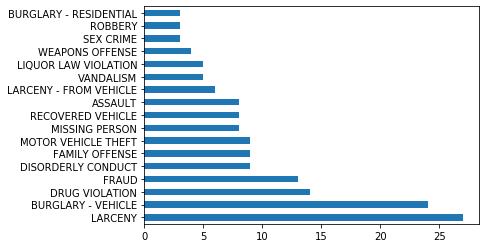

In [18]:
missing_lat_lon = calls[calls[['Lat', 'Lon']].isnull().any(axis=1)]
missing_lat_lon['CVLEGEND'].value_counts().plot(kind='barh');

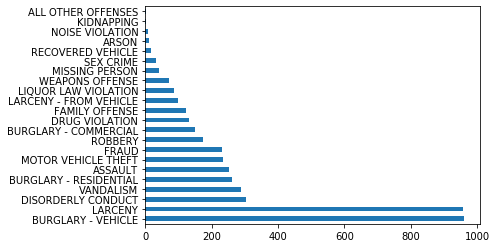

In [19]:
calls['CVLEGEND'].value_counts().plot(kind='barh');

### Observations?

There is a clear bias towards drug violations that is not present in the original data.  Therefore we should be careful when dropping missing values!

We might further normalize the analysis by the frequency to find which type of crime has the highest proportion of missing values.

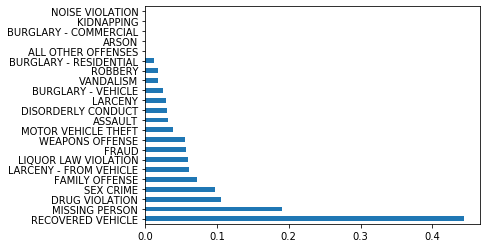

In [20]:
(missing_lat_lon['CVLEGEND'].value_counts() 
 / calls['CVLEGEND'].value_counts()
).sort_values(ascending=False).plot(kind="barh");

Now, let's make a crime map.

In [21]:
import folium
import folium.plugins

SF_COORDINATES = (37.87, -122.28)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
locs = calls[['Lat', 'Lon']].astype('float').dropna().values
heatmap = folium.plugins.HeatMap(locs.tolist(), radius=10)
sf_map.add_child(heatmap)

### Questions

1. Is campus really the safest place to be?
1. Why are all the calls located on the street and at often at intersections?


In [22]:
locations = calls[calls['CVLEGEND'] == 'ASSAULT'][['Lat', 'Lon']]

cluster = folium.MarkerCluster([])
for _, r in locations.dropna().iterrows():
    cluster.add_child(
        folium.Marker([float(r["Lat"]), float(r["Lon"])]))
    
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
sf_map.add_child(cluster)
sf_map

AttributeError: module 'folium' has no attribute 'MarkerCluster'